# Assignment # 6

Due date: Friday 10th, 11:59pm

## Q1 (2 pts) Math Evaluation


Using an appropiate data structure provide a function to evaluate a Math equation.
* Valid bracked are (), {}, and []
* Operators are +, -, *, and /.

Note: take in consideration the priority of operators

**Sample Input**
* {(2+3)*20-10**2}


**Sample Output**
* 80


In [216]:
## Elements to add in the Stack
class ElementStack:
    def __init__(self, data):
        self.data = data
        self.next = None

#FILO - First In, Last Out
class Stack:

    def __init__(self):
        self.head   = None
        self.__size = 0

    # Overwrite default method for print()
    def __str__(self):
        if self.__size == 0: return 'None'
        cur = self.head
        out = ""
        while cur != None:
            out += f"{cur.data}->"
            cur  = cur.next
        out += "None"
        return out

    # Overwrite default method for len()
    def __len__(self):
        return self.__size

    # Inserts an object at the top of the Stack.
    def push(self, data):
        new_node      = ElementStack(data)
        new_node.next = self.head
        self.head     = new_node
        self.__size  += 1
        return self.__str__()

    # Removes and returns the object at the top of the Stack.
    def pop(self):
        if self.__size == 0: return 'Error, stack is empty'
        out = self.head.data
        if self.__size == 1:
            self.head = None
        else:
            self.head = self.head.next
        self.__size -= 1
        return out

    # Returns the object at the top of the Stack without removing it.
    def peek(self):
        return self.head.data

    #Determines whether an element is in the Stack.
    def contains(self, value):
        if self.__size == 0: return False
        cur = self.head
        while cur != None:
            if cur.data == value:
                return True
            cur = cur.next
        return False

In [217]:
# Function to get operands and operator from stack to complete a single operation
def get_operands(stack, flipped=False):

    # Initialize variables
    done_looping = 0
    operand_1 = []
    operand_2 = []
    operator  = []

    # Loop until all operands and operator have been found
    while not done_looping:
        
        # Exit loop if stack is empty
        if len(stack) == 0: break

        # Look at the next item in the stack
        val = stack.peek()

        # If the value is a digit and the operator has not yet been defined, add it to the list of characters for operand 2
        if val.isdigit() and not operator:
            operand_2.append(stack.pop())
            continue

        # If the value is a digit and the operator has already been defined, add it to the list of characters for operand 1
        if val.isdigit() and operator:
            operand_1.append(stack.pop())
            continue

        # If the value is not a digit and operand 1 has not yet been defined, add it to the list of characters for the operator
        if not val.isdigit() and not operand_1:
            operator.append(stack.pop())
        else: # Else all operands and operator have been found, so stop looping
            done_looping = 1
            continue

    # Format the resulting values
    if flipped:
        result = (int(''.join(operand_2[::-1])), ''.join(operator[::-1]), int(''.join(operand_1[::-1])))
    else:
        result = (int(''.join(operand_1[::-1])), ''.join(operator[::-1]), int(''.join(operand_2[::-1])))

    # Return the operands and operator
    return result

In [218]:
# Function to evaluate a single operation
def evaluate_operation(operand_1, operator, operand_2):
    if operator == '+' : return str(operand_1 +  operand_2)
    if operator == '-' : return str(operand_1 -  operand_2)
    if operator == '*' : return str(operand_1 *  operand_2)
    if operator == '**': return str(operand_1 ** operand_2)
    if operator == '/' : return str(operand_1 /  operand_2)
    # print(operand_1, operator, operand_2)
    raise ValueError(f'Invalid operator: {operator}')

In [317]:
# Function to evaluate a mathematical expression
def math_evaluation(string):

    # Remove any spaces in string
    string = string.replace(' ', '')

    # Initialize variables
    stack = Stack()
    count                      = 0
    prev_char                  = ''
    get_second_operand         = 0
    num_low_priority_operators = 0

    # Loop over all characters in the string
    for char in string:

        # Increment the loop counter
        count += 1

        # If we are just continuing until we get the second operand into the stack
        if get_second_operand == 1:

            # If the character is a digit or a multiplication sigh preceeded by another multiplication sign (power operator), add it to the stack
            if char.isdigit() or (char == '*' and prev_char == '*'):
                stack.push(char)
                if count < len(string): continue # if not at the end of the string, continue to next loop, skipping logic below

            # Now we have the full second operator in the stack, so evaluate the operation and add the result to the stack
            stack.push(evaluate_operation(*get_operands(stack)))
            get_second_operand = 0
            if count == len(string) and char not in ['}', ']', ')']: char = '' # if at the end of the string and it's not a closing bracket, set char to empty string to avoid adding a duplicate balue to the stack in logic below

        # If the character is an opening bracket or a digit, add it to the stack
        if char in ['{', '[', '('] or char.isdigit():
            stack.push(char)
        
        # Else if the character is a low-priority operator, add it to the stack and increment the low-priority counter
        elif char in ['+', '-']:
            stack.push(char)
            num_low_priority_operators += 1

        # Else if the character is a high-priority operator, add it to the stack and set the flag to get the second operand
        elif char in ['*', '/']:
            stack.push(char)
            get_second_operand = 1

        # Else if the character is a closing bracket and there are are outstanding low-priority operators, evaluate the operation, any outstanding low-priority operations, and add the final result to the stack
        elif char in ['}', ']', ')'] and num_low_priority_operators > 0:
            
            # Create a temporary stack that flips the order until the matching opening bracket is found or stack is empty (to preserve order of operations for low-priority operators)
            temp_stack = Stack()
            temp_item  = stack.pop()
            while temp_item not in ['{', '[', '(']:
                temp_stack.push(temp_item)
                if len(stack) == 0: break
                temp_item = stack.pop() # will remove the opening bracket from the stack at the end of the while loop

            # Loop over all outstanding low-priority operators and evaluate them (using the flipped argument since the operands are in opposite order in the temp_stack)
            for _ in range(num_low_priority_operators):
                temp_stack.push(evaluate_operation(*get_operands(temp_stack, flipped=True)))
                num_low_priority_operators -= 1
            stack.push(temp_stack.pop())
        
        # If we are at the end of the string and there are outstanding low-priority operators, evaluate them
        if count == len(string) and num_low_priority_operators > 0:
            
            # Create a temp stack that flips the order of the remaining values in stack (to preserve order of operations for low-priority operators)
            temp_stack = Stack()
            while len(stack) > 0:
                temp_item = stack.pop()
                temp_stack.push(temp_item)
                
            # Loop over all outstanding low-priority operators and evaluate them (using the flipped argument since the operands are in opposite order in the temp_stack)
            for _ in range(num_low_priority_operators):
                temp_stack.push(evaluate_operation(*get_operands(temp_stack, flipped=True)))
                num_low_priority_operators -= 1
            stack.push(temp_stack.pop())
        
        # Store the previous character (need this to account for power operator: **)
        prev_char = char

    # Return the final result
    return stack.pop()

In [318]:
# Test the function
print(f' {{(2 + 3) * 20 -     10 ** 2}}  = {math_evaluation("{(2 + 3) * 20 -     10 ** 2}")}')
print(f' {{(2 + 3) * 20 -     10 *  2}}  = {math_evaluation("{(2 + 3) * 20 -     10 *  2}")}')
print(f' {{(2 + 3) * 20 - 2 + 10 *  2}}  = {math_evaluation("{(2 + 3) * 20 - 2 + 10 *  2}")}')
print(f'  (2 + 3) * 20 - 2 + 10 *  2   = {math_evaluation(" (2 + 3) * 20 - 2 + 10 *  2 ")}')
print(f'({{(2 + 3) * 20 - 2 + 10 *  2}}) = {math_evaluation("({(2 + 3) * 20 - 2 + 10 *  2})")}')
print(f'{{((2 + 3)) * 20 - 2 + 10 *  2}} = {math_evaluation("({(2 + 3) * 20 - 2 + 10 *  2})")}')

 {(2 + 3) * 20 -     10 ** 2}  = 0
 {(2 + 3) * 20 -     10 *  2}  = 80
 {(2 + 3) * 20 - 2 + 10 *  2}  = 118
  (2 + 3) * 20 - 2 + 10 *  2   = 118
({(2 + 3) * 20 - 2 + 10 *  2}) = 118
{((2 + 3)) * 20 - 2 + 10 *  2} = 118


## Q2 (2 pts) Find the Closest Value In BST

Write a function that takes in a Binary Search Tree (BST) and a target integer value and returns the closest value to that target value contained in the BST.

You can assume that there will only be one closest value.

Each BST node has an integer value, a left, and a right child node. A node is said to be a valid BST node if and only if it satisfies the BST property: its value is strictly greater than the values of every node to its left; its value is less than or equal to the values of every node to its right; and its children nodes are either valid BST nodes themselves or None / null .



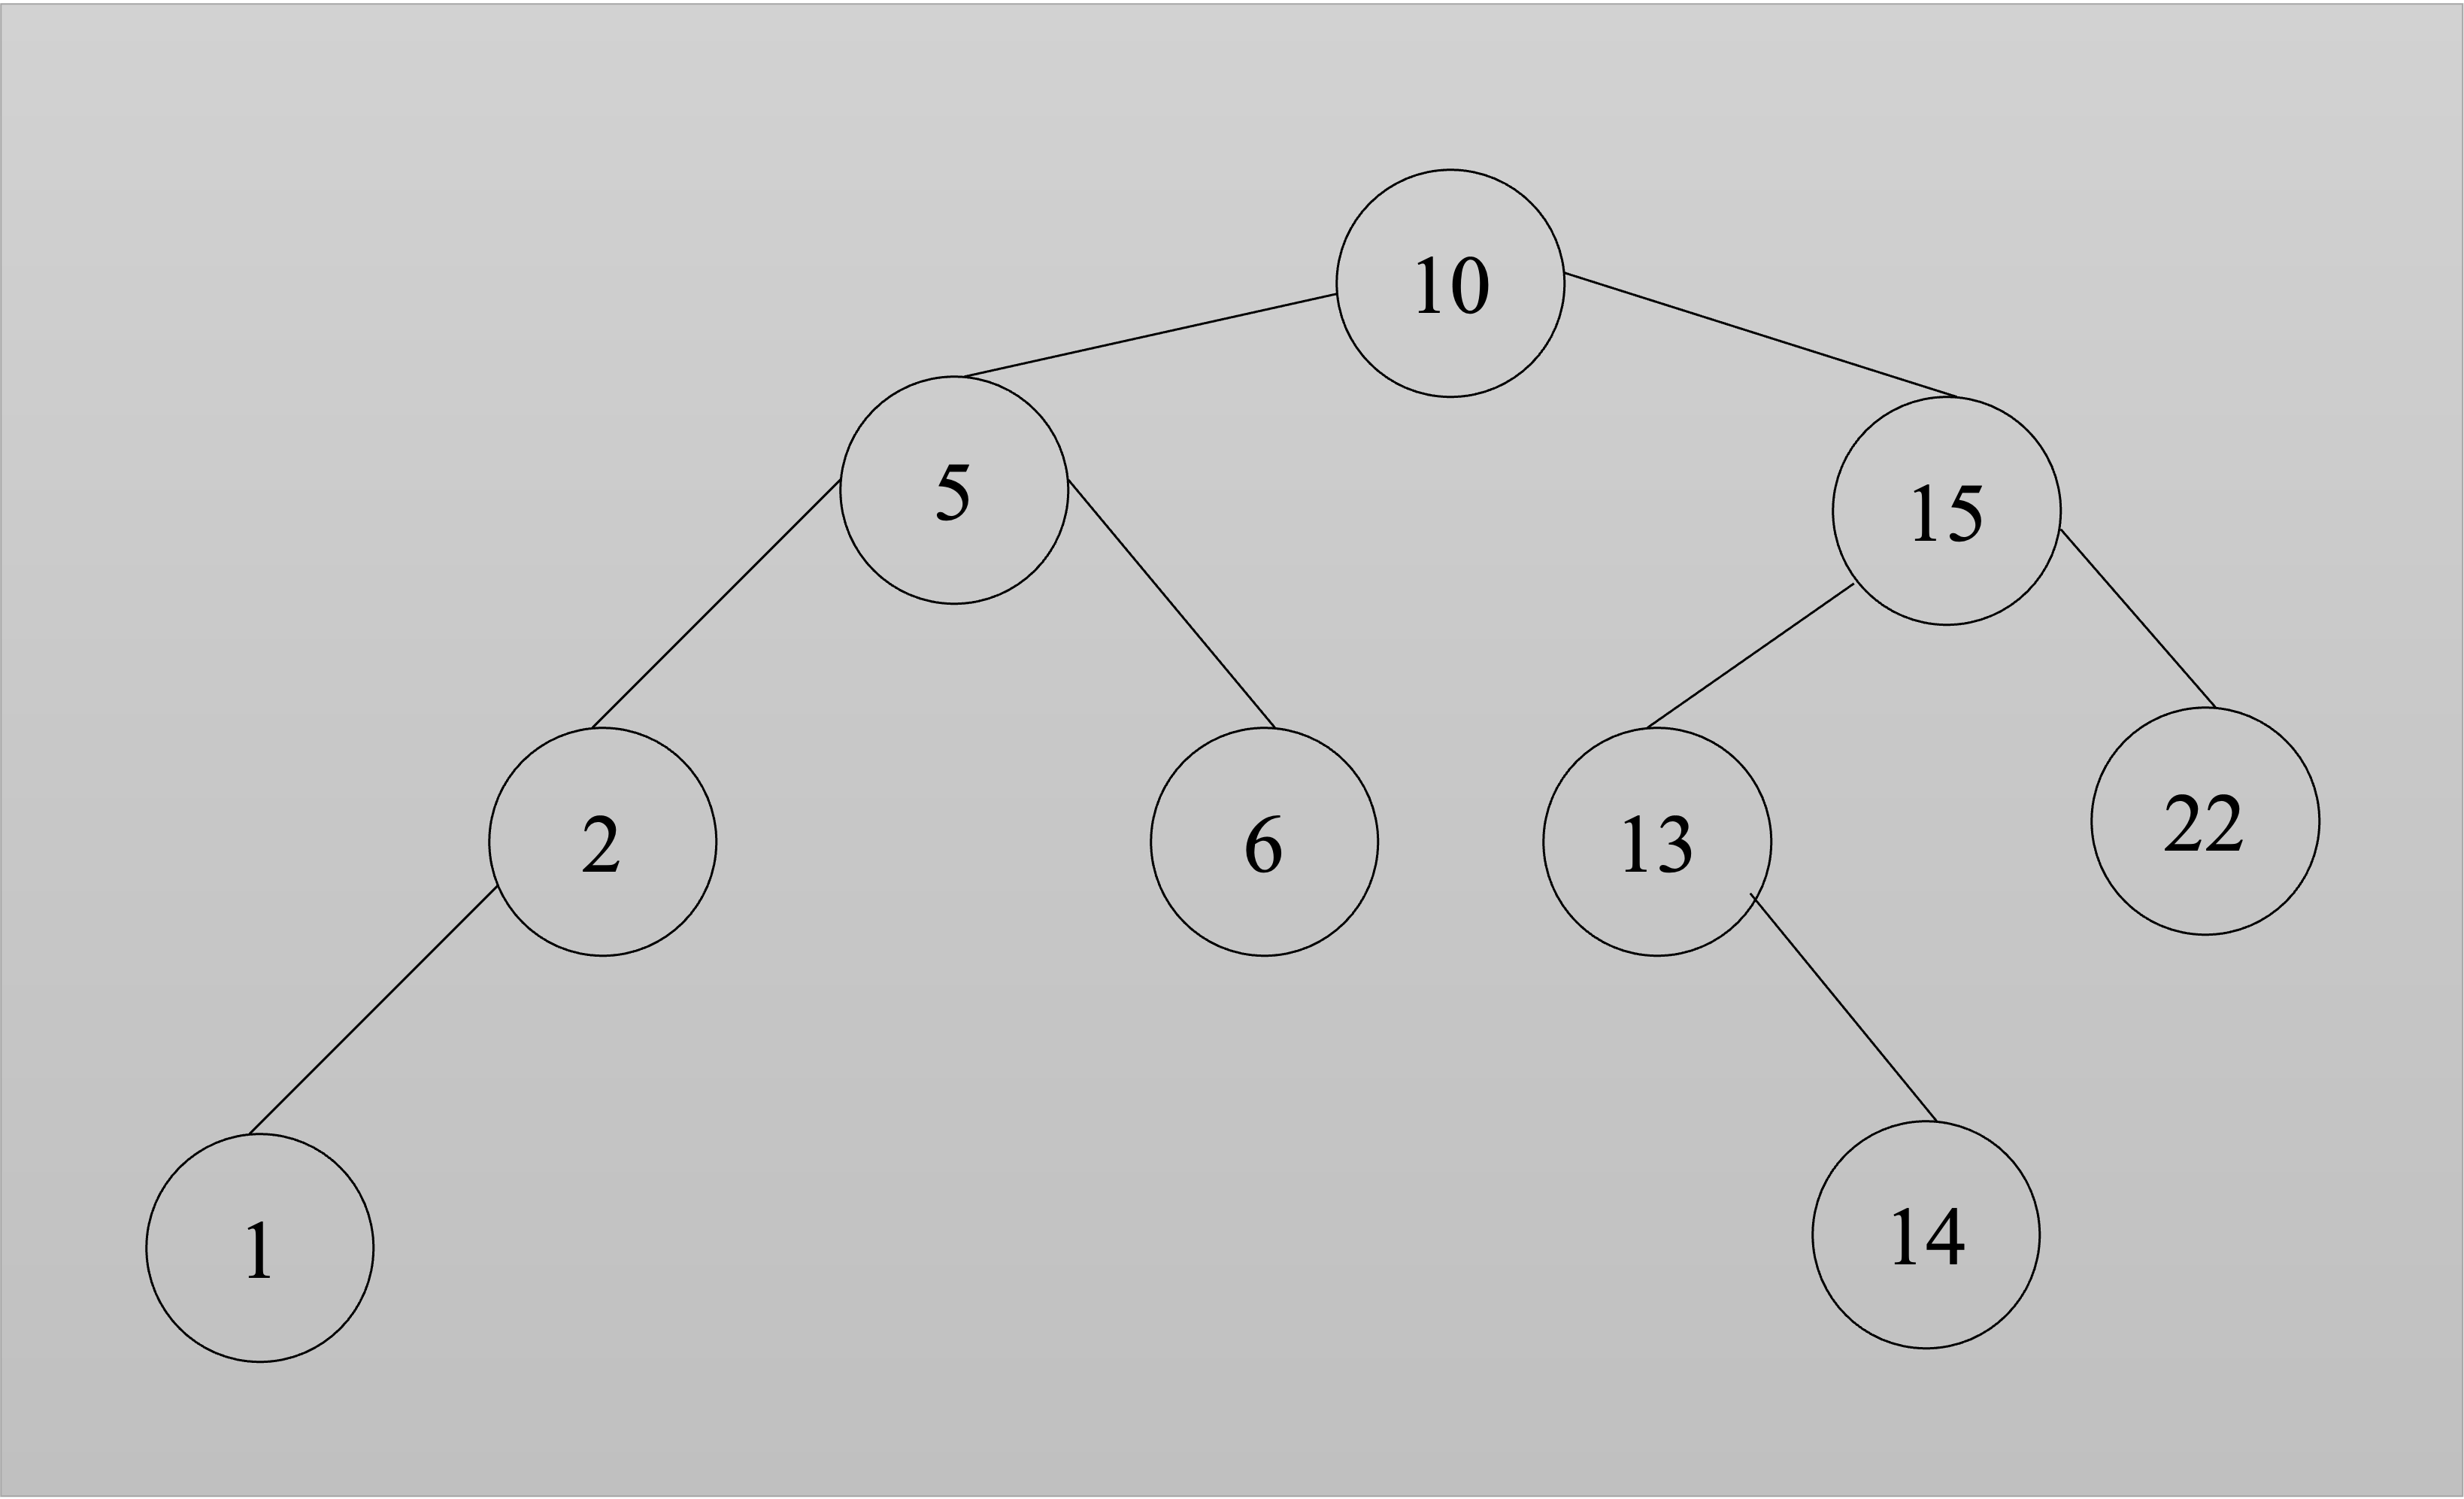

**Sample Input**

Target = 12

**Sample Output**

13


In [221]:
# Below is code taken from in-class activity for binary search tree and inserting nodes
class BST:

    def __init__(self, key, left=None, right=None):
        self.key = key
        self.left = left
        self.right = right

    def display(self):
        lines, *_ = self._display_aux()
        for line in lines:
            print(line)

    def _display_aux(self):
        """Returns list of strings, width, height, and horizontal coordinate of the root."""
        # No child.
        if self.right is None and self.left is None:
            line = "%s" % self.key
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle
        # Only left child.
        if self.right is None:
            lines, n, p, x = self.left._display_aux()
            s = "%s" % self.key
            u = len(s)
            first_line = (x + 1) * " " + (n - x - 1) * "_" + s
            second_line = x * " " + "/" + (n - x - 1 + u) * " "
            shifted_lines = [line + u * " " for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2
        # Only right child.
        if self.left is None:
            lines, n, p, x = self.right._display_aux()
            s = "%s" % self.key
            u = len(s)
            first_line = s + x * "_" + (n - x) * " "
            second_line = (u + x) * " " + "\\" + (n - x - 1) * " "
            shifted_lines = [u * " " + line for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2
        # Two children.
        left, n, p, x = self.left._display_aux()
        right, m, q, y = self.right._display_aux()
        s = "%s" % self.key
        u = len(s)
        first_line = (x + 1) * " " + (n - x - 1) * "_" + s + y * "_" + (m - y) * " "
        second_line = (
            x * " " + "/" + (n - x - 1 + u + y) * " " + "\\" + (m - y - 1) * " "
        )
        if p < q:
            left += [n * " "] * (q - p)
        elif q < p:
            right += [m * " "] * (p - q)
        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + [a + u * " " + b for a, b in zipped_lines]
        return lines, n + m + u, max(p, q) + 2, n + u // 2
    
    def __str__(self):
        return str(self.key)
    
    def PrintPreOrder(self):
        print(self.key, end=' ')
        if self.left : self.left.PrintPreOrder()
        if self.right: self.right.PrintPreOrder()

    def PrintInOrder(self):
        if self.left : self.left.PrintPreOrder()
        print(self.key, end=' ')
        if self.right: self.right.PrintPreOrder()

    def PrintPostOrder(self):
        if self.left : self.left.PrintPreOrder()
        if self.right: self.right.PrintPreOrder()
        print(self.key, end=' ')

def insertBST(node, key):
    if node is None: return BST(key)
    if key < node.key: node.left  = insertBST(node.left , key)
    else: node.right = insertBST(node.right, key)
    return node
# Above is from in-class activity, hence the lack of comments (I just copy/pasted into this workbook)

# Loop over all the nodes in the above image, ordered by layer so that the tree is built correctly
bst_root = None
for val in [10, 5, 15, 2, 6, 13, 22, 1, 14]:
    if not bst_root:
        bst_root = BST(val)
    else:
        insertBST(bst_root, val)

# Display the final tree
bst_root.display()

   _10_____   
  /        \  
  5     __15_ 
 / \   /     \
 2 6  13_   22
/        \    
1       14    


In [222]:
# Function to find the closest value to a target in a binary search tree
def find_closest_value_in_bst(bst, target):
    
    # Loop until we find the target or reach the end of the tree
    while True:

        # If the current node value is equal to the target, return it
        if bst.key == target:
            return bst.key
        
        # If the target is less than the current node value
        if target < bst.key:

            # If there is a left child node, move to it
            if bst.left:
                bst = bst.left
            else: # Else return the current node value
                return bst.key
            
        # If the target is greater than the current node value
        if target > bst.key:

            # If there is a right child node, move to it
            if bst.right:
                bst = bst.right
            else: # Else return the current node value
                return bst.key

In [223]:
# Test your code
print(f'Closest value to 12 is: {find_closest_value_in_bst(bst_root, 12)}')
print(f'Closest value to  7 is: {find_closest_value_in_bst(bst_root, 7 )}')
print(f'Closest value to 60 is: {find_closest_value_in_bst(bst_root, 60)}')

Closest value to 12 is: 13
Closest value to  7 is: 6
Closest value to 60 is: 22


## Q3 (2 pts)

3.1) Find if Same Frequency
Define a function which takes two lists as parameters and check if two given lists have the same frequency of elements.

**Example**:

* list1 = [1, 2, 3, 2, 1]
* list2 = [3, 1, 2, 1, 3]

list1 has 3 unique elements 1,2,3 appearing 2,2,1 times respectively. list2 also has 3 unique elements 1,2,3 occuring 2,1,2 times respectively. Therefore, list1 and list2 does not have the same frequency of elements.

check_same_frequency(list1, list2)

Output: False

In [224]:
# Function to check if two lists have the same frequency of occurance of keys (values)
def check_same_freq(list_1, list_2):

    # Initialize dictionaries for counting frequency
    lists = [list_1, list_2]
    dicts = [{}    , {}    ]

    # Loop each list and all keys in them
    for i in range(len(lists)):
        dct = dicts[i]
        lst = lists[i]
        for j in range(len(lst)):
            key = lst[j]

            # If the value is not in the corresponding dictionary, add it with a count of 1
            if key not in dct.keys():
                dct[key] = 1
            else: # Else increment the count
                dct[key] += 1

    # Loop over all keys in the first dictionary
    for key in dicts[0]:

        # If the key does not exist in the second dictionary, return False
        if key not in dicts[1].keys():
            return False
        
        # If the values for the key are not equal, return False
        if dicts[0][key] != dicts[1][key]:
            return False
        
    # If we get to the end, all keys exist in both lists and have the same frequency
    return True

In [225]:
print(check_same_freq([1, 2, 3, 2, 1], [3, 1, 2, 1, 3]))
print(check_same_freq([1, 2, 3, 2, 1], [3, 1, 2, 1, 2]))

False
True


3.2) Reverse Key-Value Pairs
Define a function which takes as a parameter dictionary and returns a dictionary in which everse the key-value pairs are reversed.


While reversing key-value pairs if the key is duplicated then append the values in a list.

Example:

my_dict = {'a': 1, 'b': 2, 'c': 3}


reverse_dict(my_dict)


Output:

{1: 'a', 2: 'b', 3: 'c'}

In [226]:
# Function to reverse a dictioanry and store duplicate keys in a list
def reverse_dict(my_dict):

    # Initialize a new dictionary
    new_dict = {}
    
    # Loop over all dictionary keys
    for key, val in my_dict.items():

        # If the value is not in the new dictionary, initialize the new dictionary value list
        if val not in new_dict.keys():
            new_dict[val] = [key]
        else: # Else append the key to the new dictionary value list
            new_dict[val].append(key)

    # Return the new dictionary
    return new_dict

In [227]:
print(reverse_dict({'a': 1, 'b': 2, 'c': 3}))
print(reverse_dict({'a': 1, 'b': 2, 'c': 3, 'd': 2, 'e': 1}))

{1: ['a'], 2: ['b'], 3: ['c']}
{1: ['a', 'e'], 2: ['b', 'd'], 3: ['c']}


## Q4 (2 pts)

Given a string, check if the given string is a [pangram](https://en.wikipedia.org/wiki/Pangram) or not. https://en.wikipedia.org/wiki/Pangram



In [228]:
# Function to check if a string is a pangram
def is_pangram(string):

    # Loop over all characters in string and store only alphabetic characters into a set, then return if the length of the set is 26 (string contains all letters in English alphabet at least once)
    return len({char for char in string.lower() if char.isalpha()}) == 26

In [229]:
print(is_pangram('The quick brown fox jumps over the lazy dog'))
print(is_pangram('The quick brown fox jumps over the lazy cat'))

True
False


Check whether a given string is Heterogram or not.
https://en.wikipedia.org/wiki/Heterogram_(literature)

In [230]:
# Function to check if a string is a heterogram
def is_heterogram(string):
    
    # Loop over all characters in string and store only alphabetic characters into a set, then return if the length of the set is equal to the length of the string with all non-alpha characters removed (will only be true if all characters are unique)
    return len({char for char in string.lower() if char.isalpha()}) == len([char for char in string.lower() if char.isalpha()])

In [231]:
print(is_heterogram('The big dwarf only jumps'))
print(is_heterogram('The big dwarf only jumps once'))

True
False


## Q5 (2 pts)

Find the sum of the values at the deepest leaves of a Binary Tree.

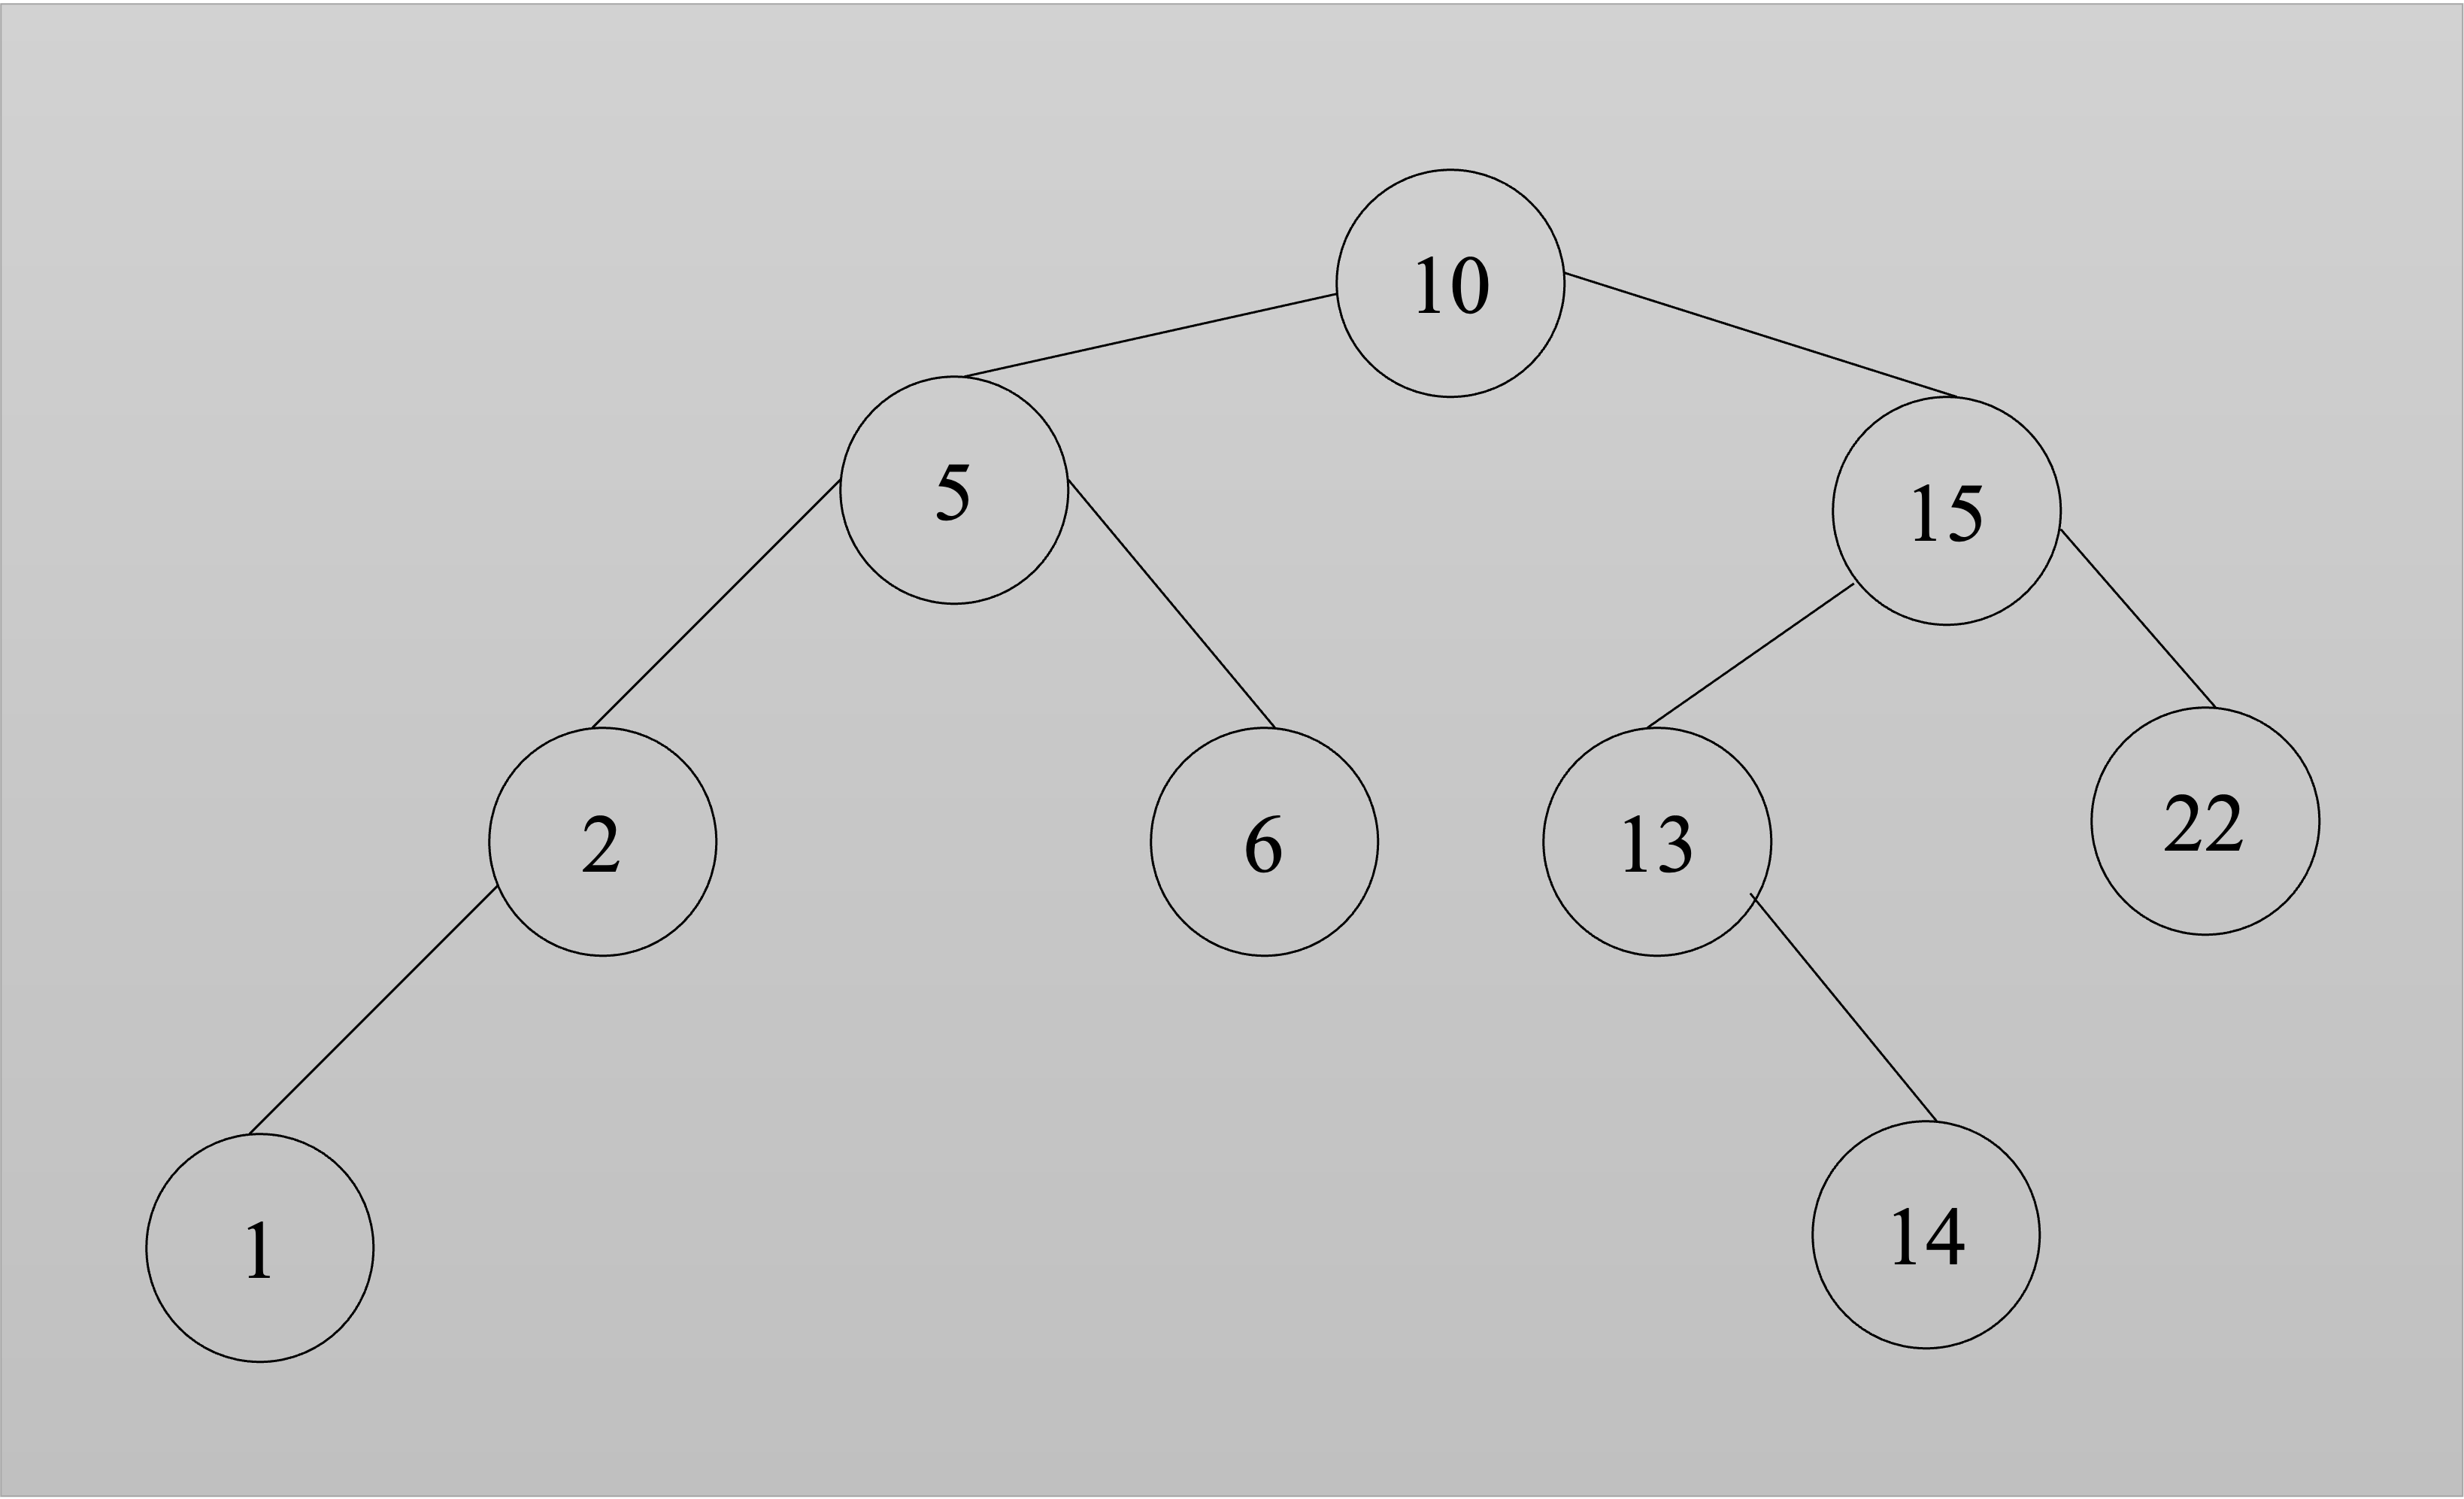


Input root = [10,5,15,2,5,13,22,1,null,null,null,null,14,null,null]


output: 15

In [232]:
# Create a subclass of the previous BST class
class new_BST(BST):
    
    # Recursive method for computing the sum of the deepest tree leaves
    def deepest_leaves_sum(self):
        
        # If the node is a leaf, return it's value and zero for depth (depth is incremented below in the recursive calls)
        if self.left is None and self.right is None: return self.key, 0
        
        # If the node has any children, compute the sum of the deepest leaves for each child and keep track of the maximum depth seen (depth is incremented by adding 1 to the depth for each recursive call)
        l_val, l_height = (a + b for a, b in zip((0, 1), self.left.deepest_leaves_sum() )) if self.left  != None else (0, 0)
        r_val, r_height = (a + b for a, b in zip((0, 1), self.right.deepest_leaves_sum())) if self.right != None else (0, 0)
        
        # Return the sum of both children if they are at the same depth, else return the sum of the child with the greatest depth and the depth of that child
        return l_val + r_val if l_height == r_height else l_val if l_height > r_height else r_val, max(l_height, r_height)

# Change the insert function from before to use the new_BST class
def insert_new_BST(node, key):
    if node is None: return new_BST(key)
    if key < node.key: node.left  = insert_new_BST(node.left , key)
    else: node.right = insert_new_BST(node.right, key)
    return node

In [233]:
# Loop over all the nodes in the above image, ordered by layer so that the tree is built correctly
bst_root = None
for val in [10, 5, 15, 2, 6, 13, 22, 1, 14]:
    if not bst_root:
        bst_root = new_BST(val)
    else:
        insert_new_BST(bst_root, val)

# Display the final tree
bst_root.display()

# Test the function
print()
print('Deepest leaves sum: %i (at depth = %i)' % bst_root.deepest_leaves_sum())

   _10_____   
  /        \  
  5     __15_ 
 / \   /     \
 2 6  13_   22
/        \    
1       14    

Deepest leaves sum: 15 (at depth = 3)


## Q6 (1 pt) Optional - Extra Bonus

When provided with the root of a binary search tree and specific lower and upper limits named as "low" and "high," the task is to modify the tree by removing any elements that fall outside the range [low, high]. This trimming operation should maintain the relative structure of the remaining elements in the tree, ensuring that any node's descendants remain descendants. It is important to note that there will be only one correct result.

The function should return the root of the trimmed binary search tree, which might vary based on the provided boundaries.

Input: root = [1,0,2], low = 1, high = 2

Output:  [1, null,2]

In [234]:
# Function to trim a binary search tree based on min and max values
def remove_outside_range(root, Min, Max):
    
    # If the root is None, return None
    if root is None: return None

    # If the root is less than the min value, return the right child
    if root.key < Min: return remove_outside_range(root.right, Min, Max)

    # If the root is greater than the max value, return the left child
    if root.key > Max: return remove_outside_range(root.left, Min, Max)

    # If the root is between the min and max values, set the left and right children to the result of calling this function on them
    root.left  = remove_outside_range(root.left , Min, Max)
    root.right = remove_outside_range(root.right, Min, Max)

    # Return the root
    return root

In [235]:
# Define tree values and trimming bounds
vals    = [1, 0, 2]
min_val = 1
max_val = 2

# Build the tree from the example
bst_root = None
for val in vals:
    if not bst_root:
        bst_root = new_BST(val)
    else:
        insert_new_BST(bst_root, val)

# Test trimming the tree
print('--Untrimmed Tree--')
print()
bst_root.display()
print()
print(f'--Trimmed Tree (min={min_val}, max={max_val})--')
print()
remove_outside_range(bst_root, min_val, max_val).display()

--Untrimmed Tree--

 1 
/ \
0 2

--Trimmed Tree (min=1, max=2)--

1 
 \
 2


In [236]:
# Rebuild the more complex tree from before
vals    = [10, 5, 15, 2, 6, 13, 22, 1, 14]
min_val = 5
max_val = 14

bst_root = None
for val in vals:
    if not bst_root:
        bst_root = new_BST(val)
    else:
        insert_new_BST(bst_root, val)

# Test trimming the tree
print('--Untrimmed Tree--')
print()
bst_root.display()
print()
print(f'--Trimmed Tree (min={min_val}, max={max_val})--')
print()
remove_outside_range(bst_root, min_val, max_val).display()

--Untrimmed Tree--

   _10_____   
  /        \  
  5     __15_ 
 / \   /     \
 2 6  13_   22
/        \    
1       14    

--Trimmed Tree (min=5, max=14)--

 _10_   
/    \  
5   13_ 
 \     \
 6    14
